In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from numpy.random import randn
#import stats library from numpy
from scipy import stats
from scipy.stats import chi2_contingency
#these are the ploting moduls and libraries we will use
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#command so that plots appear in iPython Notebook
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.preprocessing import MinMaxScaler

We want to make simple ML model (logistic regresion) that will predict the price range of the phone based on its caracteristics.

In [8]:
mobile_price_clasification_train=pd.read_csv('train.csv')

In [9]:
mobile_price_clasification_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
mobile_price_clasification_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [18]:
mobile_price_clasification_train['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [19]:
mobile_price_clasification_train=pd.DataFrame(mobile_price_clasification_train)
mobile_price_clasification_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


We will use MinMax scaler to transform all features so we can comare them and have it on the same scale. We use this type of scaler because variables are not normally distributed.

In [24]:
columns_to_scale=['battery_power','clock_speed','fc', 
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

In [26]:
scaler = MinMaxScaler()

In [27]:
mobile_price_clasification_train_scaled = scaler.fit_transform(mobile_price_clasification_train[columns_to_scale])

In [28]:
mobile_price_clasification_train_scaled=pd.DataFrame(mobile_price_clasification_train_scaled,columns= columns_to_scale)

In [29]:
mobile_price_clasification_train_scaled.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778
2,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889
3,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000
4,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222


We see that front camera and primary camera of the mobile phone are highly correlated (0.64) as well as height and width which is expected while all other features are highly independent, uncorrelated.

In [30]:
correlation_matrix = mobile_price_clasification_train_scaled.corr()

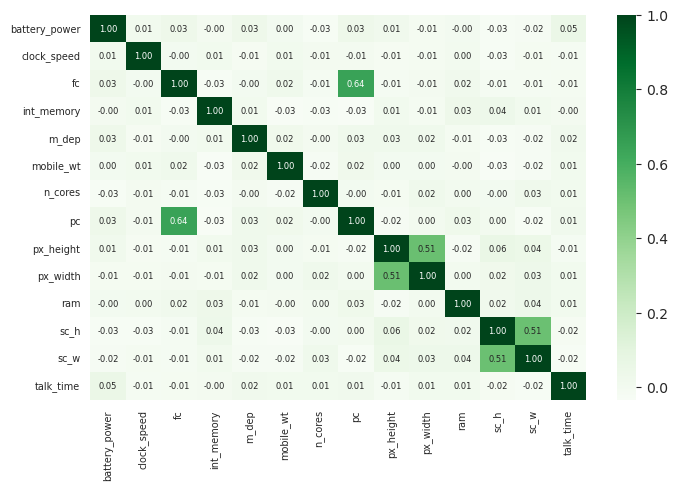

In [31]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens',annot_kws={"size": 6})
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

In [34]:
concat_columns=mobile_price_clasification_train[['blue','dual_sim','four_g','three_g',
       'touch_screen', 'wifi']]

In [71]:
x=pd.concat([mobile_price_clasification_train_scaled,concat_columns],axis=1)

In [72]:
x.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0,0,0,0,0,1
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1,1,1,1,1,0
2,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1,1,1,1,1,0
3,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1,0,0,1,0,0
4,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1,0,1,1,1,0


In [41]:
y=mobile_price_clasification_train.price_range

In [43]:
y.shape

(2000,)

We have prepared data for logistic regresion and we will put 20% of data in test set.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
log_model=LogisticRegression()

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
logreg = LogisticRegression(max_iter=1000)

In [51]:
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

We have high accuracy rate on train set but we must check accuracy on test set.

In [52]:
logreg.score(x_train,y_train)

0.938125

In [88]:
coeff_df = pd.DataFrame(logreg.coef_.T, # Transpose to make each column represent coefficients for a class
    index=x.columns)  # Feature names as index
    #columns=[f'Class_{i}' for i in range(logreg.coef_.shape[0])])# Naming each class

# Reset index if you prefer features as a column
#coeff_df.reset_index(inplace=True)
coeff_df.rename(columns={'index': 'Feature'}, inplace=True)
column_names=['class_1','class_2','class_3','class_4']
coeff_df.columns=column_names
coeff_df

,class_1,class_2,class_3,class_4
battery_power,-3.394393,-0.978591,0.905995,3.466989
clock_speed,0.192110,-0.121548,0.056132,-0.126693
fc,-0.123774,0.179362,0.085779,-0.141366
int_memory,-0.198633,0.011429,-0.242703,0.429907
m_dep,-0.053576,0.300874,-0.167040,-0.080257
mobile_wt,0.454838,0.161343,0.153674,-0.769855
n_cores,0.034459,-0.297100,0.131221,0.131420
pc,-0.052157,-0.035606,0.013265,0.074498
px_height,-2.525987,-0.417398,0.753076,2.190309
px_width,-2.026607,-0.636872,0.479101,2.184377


In [53]:
class_predict=logreg.predict(x_test)

In [64]:
print(class_predict)

[0 2 1 3 1 1 2 0 3 1 0 0 2 3 3 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 2 1 2
 0 3 0 2 3 2 0 2 3 1 1 3 1 3 1 0 0 1 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 3 0 1
 2 0 1 3 2 2 3 1 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 2 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 3 3 0 2 1 3 2 2 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 3 1 3 2 0 0 0 1
 2 2 3 1 1 0 2 2 0 1 0 2 2 3 3 3 1 0 0 2 2 2 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 3 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 1
 3 0 0 2 1 3 0 1 1 0 1 3 2 0 1 2 3 0 1 3 2 3 0 3 1 2 3 3 2 1 0 3 3 1 3 3 3
 3 3 0 1 2 2 2 2 0 2 3 2 2 2 1 0 2 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 1 3 2 0 2 1 1 1 0 0 0 3 3 3 1 0 1 0 1 2 2 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 1 1 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 3
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 3 3 2 1 1 2]


In [61]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

We have very good model because accuracy rate is 94%. That means that when we have those atributes we can estimate a price range with accuracy of 94%.

In [62]:
metrics.accuracy_score(y_test,class_predict)

0.94

Confusion Matrix:
[[105   0   0   0]
 [  1  86   4   0]
 [  0   9  77   6]
 [  0   0   4 108]]


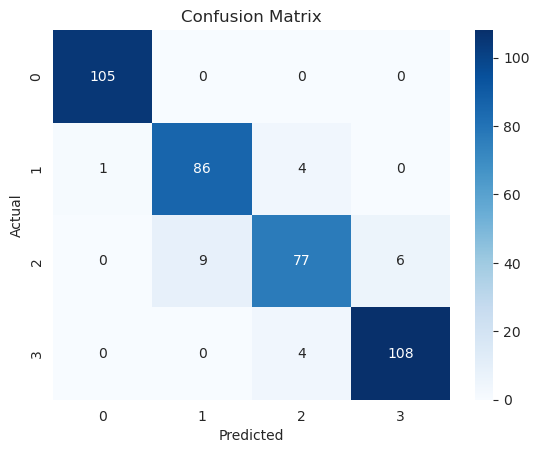

In [63]:
cm = confusion_matrix(y_test, class_predict)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [67]:
f_macro = metrics.f1_score(y_test, class_predict, average='macro')

In [68]:
f_macro

0.9364501389668325

In [69]:
f_weighted = metrics.f1_score(y_test, class_predict, average='weighted')

In [70]:
f_weighted

0.9393558820759468